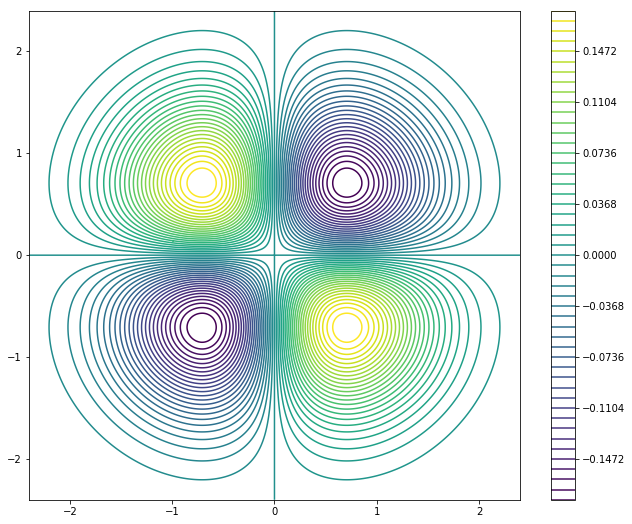

In [129]:
"""
Draw contour of a function via numpy.linspace, np.meshgrid, and plt.contour
"""
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2.4, 2.4, 1000)
xx, yy = np.meshgrid(x, x)

zz = -xx*yy*np.exp(-xx**2 - yy**2)
levels = np.linspace(np.min(zz), np.max(zz), 51)
plt.contour(x, x, zz, levels = levels)
cbar = plt.colorbar()

fig = plt.gcf()
fig.set_size_inches(11, 9)

In [108]:
def f(x, y):
    return -x*y*np.exp(-x**2 - y**2)

In [111]:
x = np.linspace(-3, 3, 1000)
xx, yy = np.meshgrid(x, x)

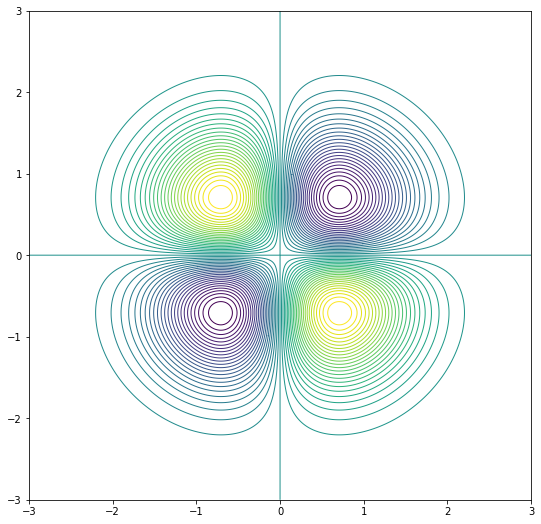

In [114]:
zz = f(xx, yy)
levels = np.linspace(np.min(zz), np.max(zz), 51)
plt.contour(x, x, zz, levels = levels, linewidths = 1)
fig = plt.gcf()
fig.set_size_inches(9, 9)

In [96]:
min(zz)

array([[-0.00892639, -0.0090121 , -0.00909838, ...,  0.00909838,
         0.0090121 ,  0.00892639],
       [-0.0090121 , -0.00909863, -0.00918574, ...,  0.00918574,
         0.00909863,  0.0090121 ],
       [-0.00909838, -0.00918574, -0.00927369, ...,  0.00927369,
         0.00918574,  0.00909838],
       ...,
       [ 0.00909838,  0.00918574,  0.00927369, ..., -0.00927369,
        -0.00918574, -0.00909838],
       [ 0.0090121 ,  0.00909863,  0.00918574, ..., -0.00918574,
        -0.00909863, -0.0090121 ],
       [ 0.00892639,  0.0090121 ,  0.00909838, ..., -0.00909838,
        -0.0090121 , -0.00892639]])

In [23]:
data[256][0]

array([255, 255, 255], dtype=uint8)

In [4]:
from scipy import misc
img = misc.imread('./python_logo.png')
img= np.asarray(img)
img = img / 255

D:\Programming\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


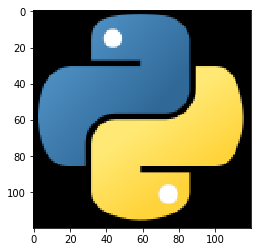

In [30]:
plt.imshow(img, interpolation = 'nearest')

In [31]:
img.size

43200

In [59]:
data = np.random.rand(120,120, 3)

In [61]:
np.linalg.norm(data-img)

101.742623398483

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


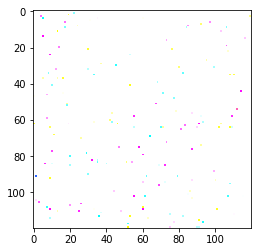

In [46]:
plt.imshow(data, interpolation = 'nearest')

In [49]:
img = img / 255

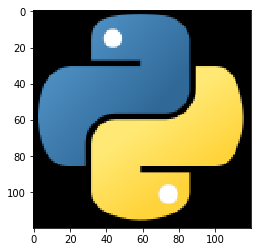

In [55]:
plt.imshow(img, interpolation = 'nearest')

In [78]:
n = 8
times = 70

parent = [0]*n
child = [np.zeros((120,120,3)) for i in range(n)]
cost = [0]*n
prob = [0]*n
cum = [0]*n
parent[0] = np.array([[[1.0,1.0,0]]*120]*120)
parent[1] = np.array([[[0,0,1.0]]*120]*120)
parent[2] = np.array([[[0.0,0.0,0.0]]*120]*120)
parent[3] = np.array([[[1.0,1.0,1.0]]*120]*120)
parent[4] = np.array([[[1.0,1.0,0]]*120]*120)
parent[5] = np.array([[[0,0,1.0]]*120]*120)
parent[6] = np.array([[[0.0,0.0,0.0]]*120]*120)
parent[7] = np.array([[[1.0,1.0,1.0]]*120]*120)

for t in range(times):
    for i in range(n):
        cost[i] = 1 / np.linalg.norm(parent[i]-img)
    for i in range(n):
        prob[i] = cost[i] / sum(cost)
        cum[i] = sum(prob[0:i+1])

    for c in range(n//2):
        u1 = float(np.random.rand(1))
        u2 = float(np.random.rand(1))
        for i in range(n):
            if u1 < cum[i]:
                p1 = i
                break
        for i in range(n):
            if u2 < cum[i]:
                p2 = i
                break
#        print(p1, p2)
        for i in range(120):
            for j in range(120):
                v = float(np.random.rand(1))
                if v < 0.1:# take mean
                    probability1 = prob[p1]/(prob[p1] + prob[p2])
                    child[c][i][j] = parent[p1][i][j]*probability1 + parent[p2][i][j]*(1 - probability1)
                    child[c + n//2][i][j] = parent[p1][i][j]*probability1 + parent[p2][i][j]*(1 - probability1)
                elif v < 0.99:# choose one
                    probability1 = prob[p1]/(prob[p1] + prob[p2])
                    child[c][i][j] = parent[p1][i][j] if float(np.random.rand(1)) < probability1 else parent[p2][i][j]
                    child[c + n//2][i][j] = parent[p2][i][j] if float(np.random.rand(1)) < probability1 else parent[p1][i][j]
                else:
                    child[c][i][j] = np.random.rand(3)
                    child[c + n//2][i][j] = np.random.rand(3)
    parent = child
    child = [np.zeros((120,120,3)) for i in range(n)]


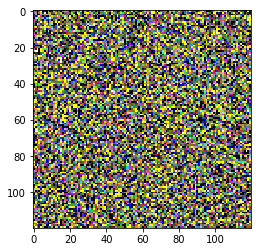

In [82]:
plt.imshow(parent[4], interpolation = 'nearest')

In [41]:
child

[array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]), array([[[0., 0., 0.],
         [0., 0., 0.],
         [

In [97]:
a = 1 if False else a = 2

SyntaxError: can't assign to conditional expression (<ipython-input-97-60e434944649>, line 1)

In [23]:
a = np.array([5])

In [24]:
a

array([5])

In [25]:
b = a

In [26]:
b

array([5])

In [28]:
a[0] = 10

In [29]:
b

array([10])